<a href="https://colab.research.google.com/github/shaifali1102/unsupervised-learning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **K-Means Algorithm**

The K-Means algorithm is an unsupervised learning algorithm that partitions a set of data points into K distinct clusters. The algorithm works by iteratively assigning data points to clusters and then updating the cluster centroids. This process is repeated until the cluster centroids no longer change.

**Algorithm:**

1. Initialize K random centroids.
2. Repeat until the centroids no longer change:
    * Assign each data point to the nearest centroid.
    * Update the centroids to be the mean of all the data points assigned to them.

**Applications:**

The K-Means algorithm is used in a variety of applications, including:

* Customer segmentation
* Image segmentation
* Document clustering
* Anomaly detection

**Strengths:**

* Simple to implement
* Efficient
* Scalable

**Weaknesses:**

* Sensitive to initial conditions
* Can only find spherical clusters
* Can be computationally expensive for large datasets

**Overall, the K-Means algorithm is a powerful and versatile unsupervised learning algorithm that can be used to solve a variety of clustering problems.**


References :

1. https://www.cs.cornell.edu/courses/cs4780/2022sp/notes/LectureNotes04.html
2. https://medium.datadriveninvestor.com/k-means-clustering-machine-learning-in-python-1810231efef5
3. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
4. http://tech.nitoyon.com/en/blog/2013/11/07/k-means/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-02-22 09:33:18--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 74.125.142.113, 74.125.142.100, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-02-22 09:33:18--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s 

In [ ]:
df = pd.read_csv('E-commerce.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [ ]:
df.shape

(2500, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [ ]:
df.describe(include="all")

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


# LLyod's Algo from Scratch

In [9]:
# Create an artificial dataset

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

data_size = 2000
num_iters = 5
num_clusters = 4

from sklearn.datasets import make_blobs

data, y = make_blobs(n_samples=data_size, centers=num_clusters, n_features=2, random_state=0)

print(y) #labels
print(data) #datapoints

[2 0 1 ... 0 2 0]
[[-0.46530384  1.73299482]
 [-0.33963733  3.84220272]
 [ 2.25309569  0.99541446]
 ...
 [ 1.03616476  4.09126428]
 [-0.5901088   3.68821314]
 [ 2.30405277  4.20250584]]


In [10]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3]), array([500, 500, 500, 500]))

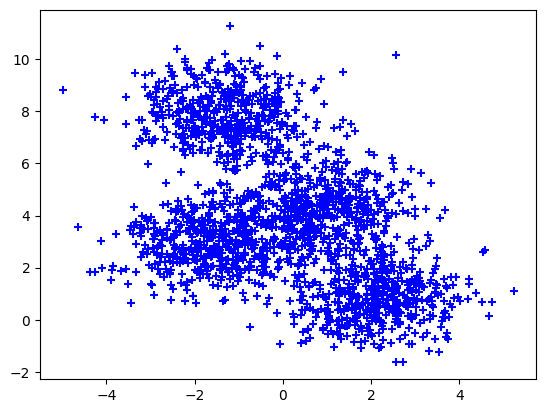

In [19]:
# plot the datapoints
plt.scatter(x = data[:,0], y= data[:, 1], marker='+', color='blue',label='data points')

In [26]:
# function to plot data as cluster and centroids
def plot(data, centroids):
  plt.scatter(x = data[:, 0], y = data[:, 1], marker='+',
              color = 'gray', label = 'data points')
  plt.scatter(x = centroids[0], y = centroids[1],
              color = 'red', label = 'centroid')
  plt.legend()
  plt.xlim(-5,12)
  plt.ylim(-10,15)
  plt.show()

In [39]:
n_clusters = 3

# initialize centroids
centroids = data[np.random.choice(range(data.shape[0]), size=(n_clusters, ))]

# list to store which centroid is assigned to each dataset
assigned_centroid = np.zeros(len(data), dtype=np.int32)

# compute distance
def compute_l2_distance(x, centroid):
  dist = np.array([]).reshape(len(x),0)
  for centroid in centroids:
    new_dist = np.sqrt(((x - centroid)**2).sum(axis=1)).reshape(-1,1)
    dist = np.hstack([dist,new_dist])
  return dist

# find the closest centroid
def get_closest_Centroid(x, centroids):

  dist = compute_l2_distance(x, centroids)

  closest_centroid_index = np.argmin(dist, axis=1)

  return closest_centroid_index

In [35]:
def k_mean():

  n_iters = 10
  for n in range(n_iters):

    # get closest centroid
    closest_centroid = get_closest_Centroid(data, centroids)

    # assign the centroid to the data point
    assigned_centroid = closest_centroid

    # Loop over centroids and calculate new ones
    for c in range(len(centroids)):

      # get all datapoints belonging to a particular cluster
      cluster_data = data[assigned_centroid == c]

      # compute the average of cluster members to compute new centroid
      new_centroid = cluster_data.mean(axis=0)

      # assign the new centroid
      centroids[c] = new_centroid

      # plot
      plt.scatter(x = cluster_data[:, 0], y = cluster_data[:, 1], marker='+',
               label = f'points={c}')
      plt.scatter(x = centroids[c][0], y = centroids[c][1],
               label = f'centre={c}')
    plt.legend()
    plt.xlim(-5,12)
    plt.ylim(-10,15)
    plt.show()



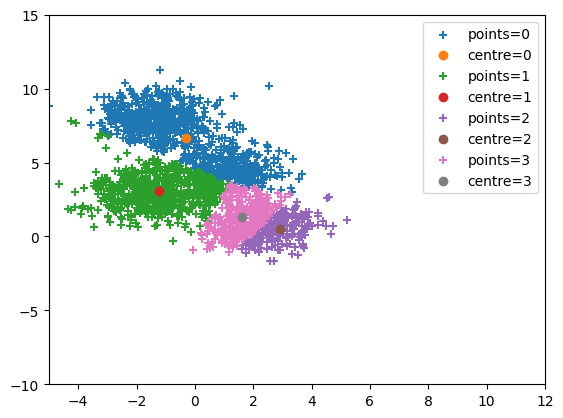

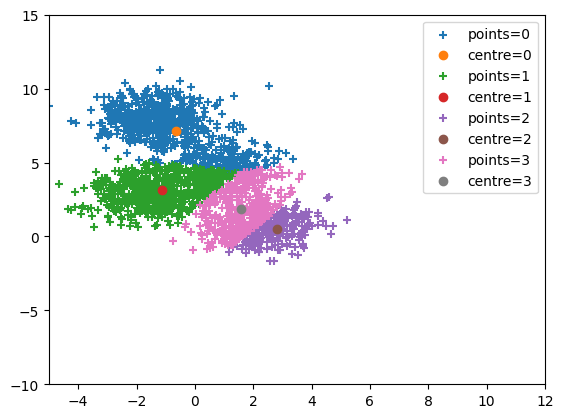

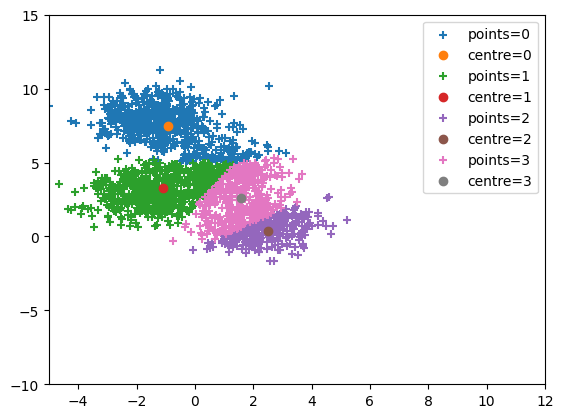

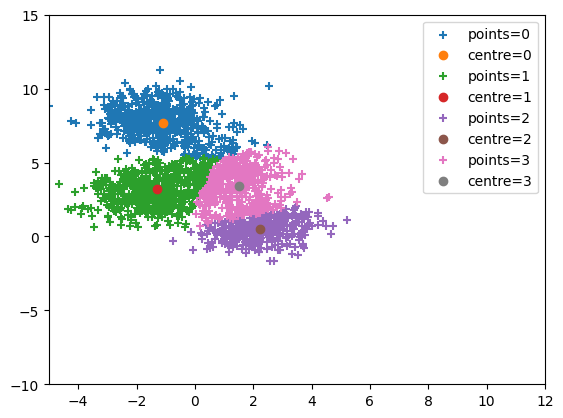

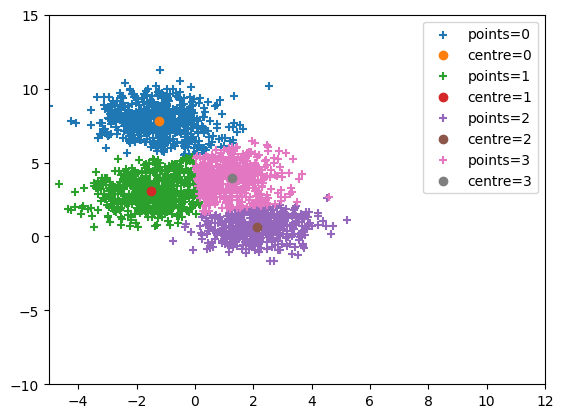

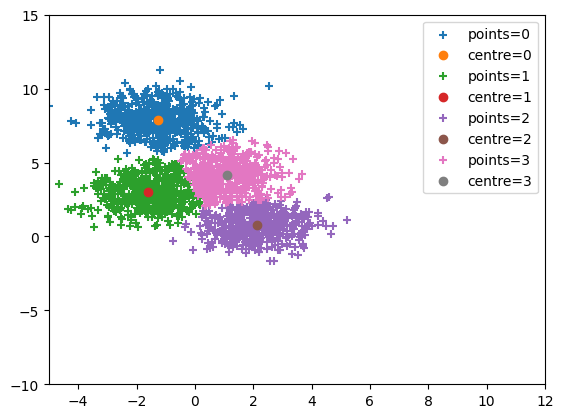

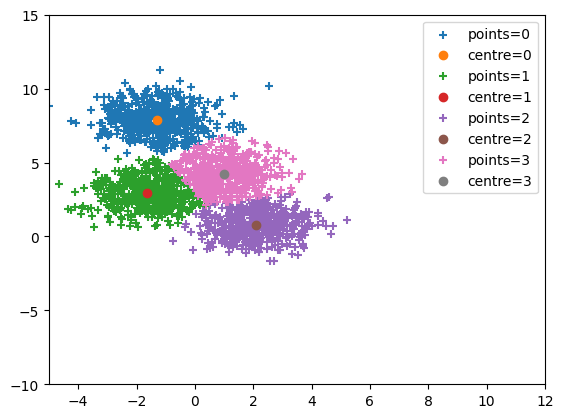

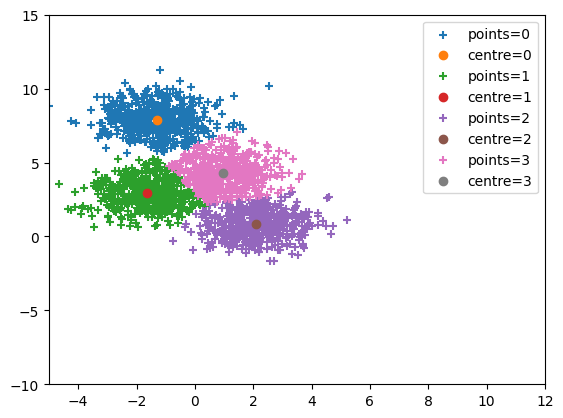

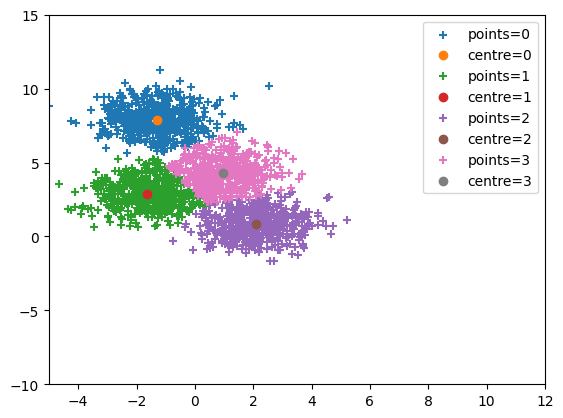

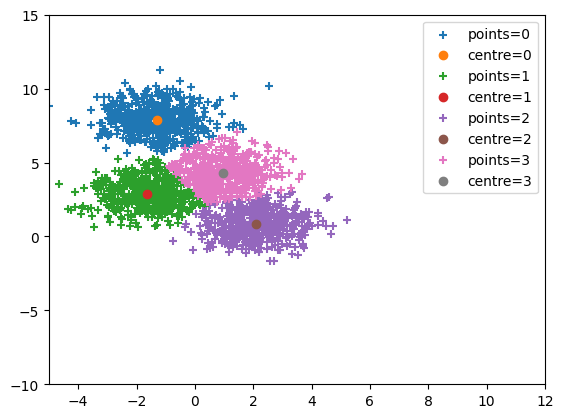

In [36]:
k_mean() # 4 Clusters

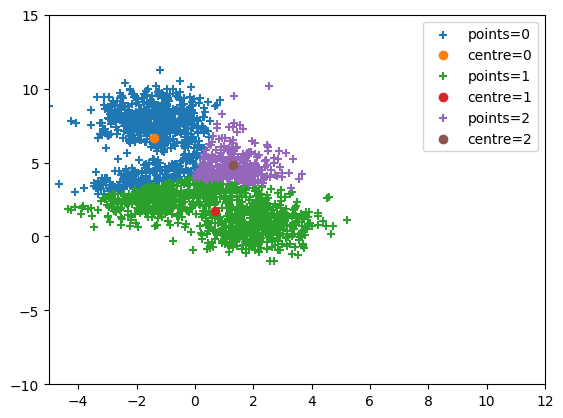

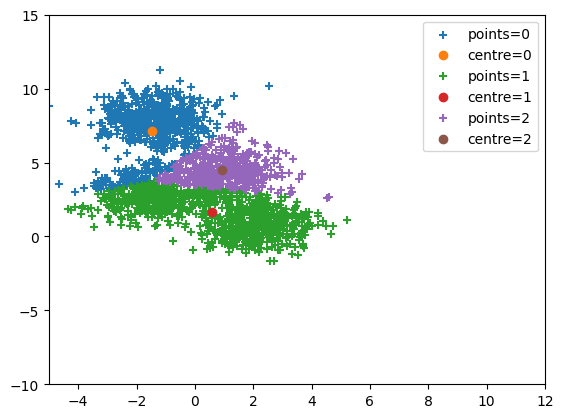

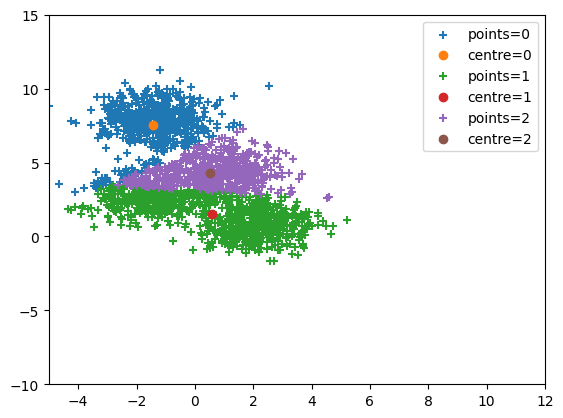

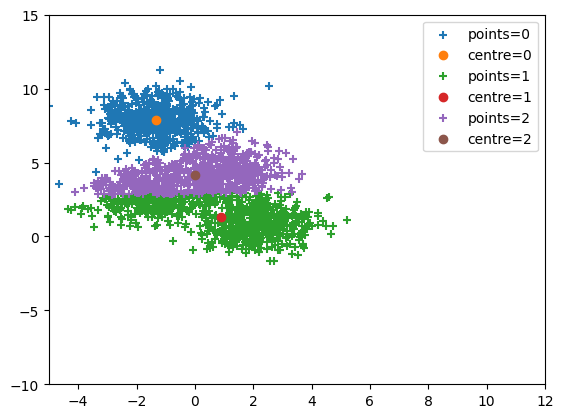

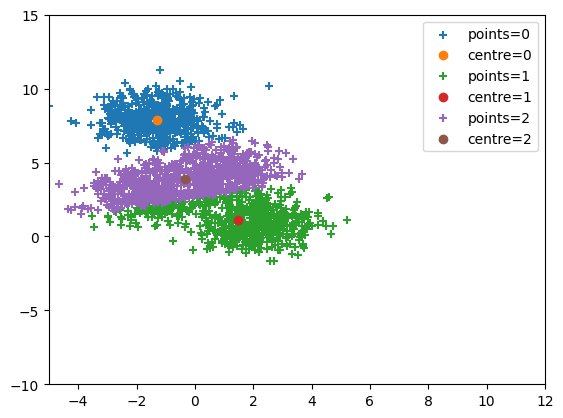

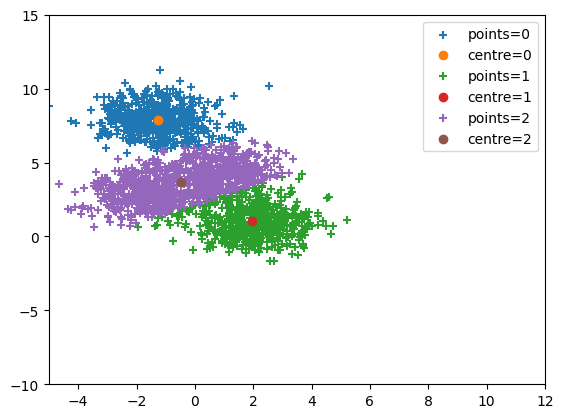

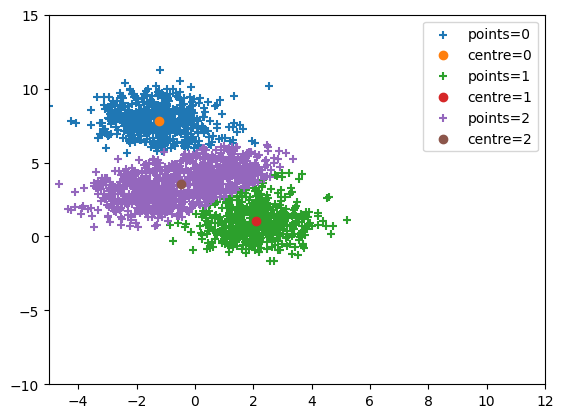

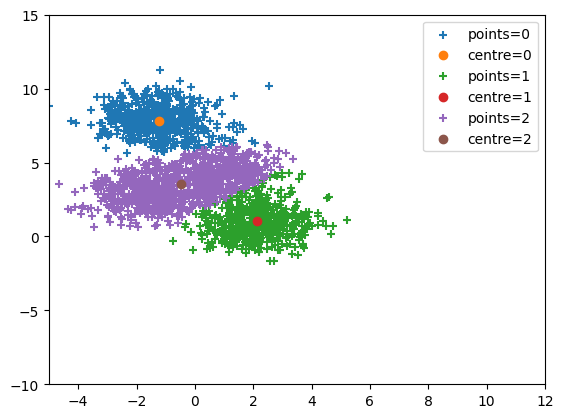

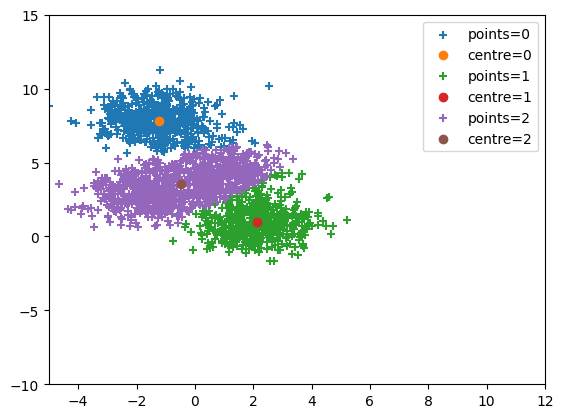

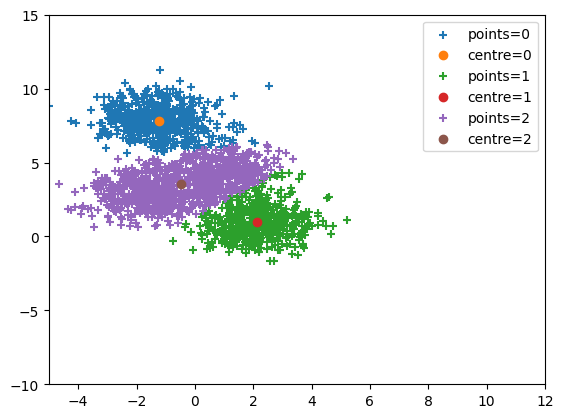

In [40]:
k_mean() # 3 clusters